<!-- dom:TITLE: Preliminaries  -->
# Preliminaries 
<!-- dom:AUTHOR: Anne Kværnø -->
<!-- Author: -->  
**Anne Kværnø**, revised by **André Massing** and **Markus Grasmair**

Original date: **Oct 19, 2018** <br>
First revision: **Feb 27, 2020** <br>
Second revision: **September 30, 2020**

Executing the following cell loads a non-default css style for the notebook. 
Make sure that you download the corresponding css file  `tma4125.css` from the course web page.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("tma4125.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

# Introduction
In your mathematical courses so far, you have learned how to solve different
mathematical problems, like linear and nonlinear equations and differential
equations. You have learned how to differentiate and to integrate functions.  
Unfortunately, only simplified models from "real life" applications can be
treated by these techniques, for more complex and realistic problems the best we
can aim for is some kind of an approximate solution, found on a computer by some
clever numerical algorithms. In this part of the course, our concern is how to
develop, analyse, implement and test a selection of such algorithms. 

We are specifically concerned with methods from numerical analysis, where
we want to find numerical approximations of solutions of problems from
analysis like integration or the solution of differential equations.
For this type of problems, analytic solutions exist only rarely,
and even when they exist, they might be written in terms of infinite series.
Thus some type of approximation is needed in any case in order to
evaluate the results.

We will not deal in this course with symbolic methods as implemented in
computer algebra systems like Maple or also Wolfram Alpha.
While such systems have gained lots of attention in academic and
more general educational circles, they are far less common in actual
industrial applications outside academia.
Moreover, the mathematics behind these systems rely heavily on
theoretical results in algebra that go far beyond what has been
covered in the basic maths classes at NTNU. As a consequence, it
would be almost impossible to give a reasonable introduction into
these methods in any case.


### Goal of this note

In this note, we will present some mathematical results that will be 
used frequently, as well as some definitions and concepts. Most of it should be known from
previous courses, in particular from Mathematics 1 and 3. 

Whenever some theoretical error analysis has been established, it should be
verified numerically. This is done based on a test problem with a known exact
solution, so the error in our numerical experiment can be evaluated, and the
theory numerically verified. Examples of such verifications will be demonstrated. 

# Vector spaces and norms
**Real vector spaces.**

A *real vector space* is a set $V$ together with operations $+$ (addition) 
and $\cdot$ (multiplication with a scalar) which
satisfy the following conditions:

1. &emsp;$x+y \in V$ for all $x$, $y \in V$.
2. &emsp;$x+y = y+x$ for all $x$, $y \in V$.
3. &emsp;$x+(y+z) = (x+y)+z$ for all $x$, $y$, $z \in V$.
4. &emsp;There exists some element $0 \in V$ such that $x + 0 = x$ for all $x \in V$.
5. &emsp;For all $x \in V$, there exists some element $(-x) \in V$ such that $x + (-x) = 0$.
6. &emsp;$\alpha\cdot x \in V$ for all $x \in V$ and $\alpha \in \mathbb{R}$.
7. &emsp;$\alpha\cdot(\beta\cdot x) = (\alpha\beta)\cdot x$ for all $x \in V$ and $\alpha$, $\beta \in \mathbb{R}$.
8. &emsp;$1\cdot x = x$ for all $x \in V$.
9. &emsp;$\alpha\cdot(x+y) = \alpha\cdot x + \alpha\cdot y$ for all $x$, $y \in V$ and $\alpha \in \mathbb{R}$.
10. &emsp;$(\alpha+\beta)\cdot x = \alpha\cdot x + \beta\cdot x$ for all $x \in V$ and $\alpha$, $\beta \in \mathbb{R}$.

#### Examples:
The following vector spaces will be used thoughout the course:

* $\mathbb{R}^m$ is the set of all real vectors with $m$ components. 

* $\mathbb{R}^{m\times n}$ is the set of all $m\times n$ real matrices.

* $C^m[a,b]$ is the set of all functions with continuous first $m$ derivatives on the interval $[a,b]$. It is common to use $C[a,b]$ rather than $C^0[a,b]$ for all continuous functions.   

* $\mathbb{P}_n$ is the set of all polynomials of degree $n$ or less. 

Notice that $C^n[a,b] \subset C^m[a,b]$ if $n > m$. 
Further, $\mathbb{P}_n \subset C^{\infty}[\mathbb{R}]$.

### Norms

**Norm $\lVert\cdot\rVert$.**

A norm is a function $\lVert\cdot\rVert \colon V \to \mathbb{R}$ such that the following hold:
1. &emsp;$\lVert x \lVert \ge 0$ for all $x \in V$.
2. &emsp;$\lVert x \rVert = 0$ if and only if $x = 0$.
3. &emsp;$\lVert \alpha \cdot x \rVert = \lvert \alpha \rvert \,\lVert x \rVert$ for all $x \in V$ and $\alpha \in \mathbb{R}$.
4. &emsp;$\lVert x + y\rVert \le \lVert x \rVert + \lVert y \rVert$ for all $x$, $y \in V$.

The last property is called the *triangle inequality*.

The norm $\lVert\cdot\rVert$ of an element $x$ in a vector space $V$ is essentially a measure of the size of the element. More importantly, the norm $\lVert x-y\rVert$ of a difference of two vectors $x$, $y \in V$ is a measure for the distance between $x$ and $y$, or, put differently, of how similar $x$ and $y$ are.



**Norms for $C[a,b]$ and $\mathbb{R}^m$:**

For any given vector space $V$, there are usually different meanigful definitions of norm that encode different notions of similarity of elements of the vector space.

* For $f\in C[a,b]$, we will make use of the following two distances: 

  * The maximum-norm $\|f\|_{\infty} = \max_{x\in [a,b]}|f(x)|$, which measures the *maximal* pointwise difference of $f(x)$ and $g(x)$.

  * The $L^2$-norm $\|f\|_2 = \sqrt{\int_a^b f(x)^2dx}$, which measures the *average* (quadratic) difference of $f(x)$ and $g(x)$. 


* For $\mathbf{x} \in \mathbb{R}^m$, we will similarly use:  

  * The maximum-norm $\|\mathbf{x}\|_{\infty} = \max_{i=1}^m |x_i|$. 

  * The Euclidean norm $\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^m x_i^2}$.


Note that we will use bold symbols for vectors $\mathbf{x} \in \mathbb{R}^m$. 

As is demonstrated in these examples, the norm to which we
refer is usually marked with a subscript. 
We will always use the absolute value as the norm of a real number, thus
$\|x\|=|x|$ whenever $x\in \mathbb{R}$.   

**Example 1:**
Let $\mathbf{x}=[1,-6,3,-1,5]^T\in \mathbb{R}^5$. Then

$$
\begin{aligned}
  \|\mathbf{x}\|_2 &= \sqrt{1+36+9+1+25} = 8.4853, \\ 
  \|\mathbf{x}\|_{\infty} &= \max\{1,6,3,1,5\}= 6.
\end{aligned}
$$

Norms of vectors in $\mathbb{R}^m$  are implemented in Python.

In [2]:
%matplotlib inline

from numpy import *
from numpy.linalg import norm
from matplotlib.pyplot import *
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [3]:
# The norm of a vector in R^n
x = np.array([1, -6, 3, -1, 5])
nx_2 = norm(x)              # The 2-norm is the default
nx_inf = norm(x,ord=inf)    # The max-norm
print('x = \n', x)
print('The 2-norm   of x: {:8.4f}'.format(nx_2))
print('The max-norm of x: {:8.4f}'.format(nx_inf))

x = 
 [ 1 -6  3 -1  5]
The 2-norm   of x:   8.4853
The max-norm of x:   6.0000


**Example 2:**
Let $f(x)=\sin(x)$ on $[0,2\pi]$, so $f\in C^{\infty}[0,2\pi]$. In this case

$$
\begin{aligned}
  \|f\|_2 &= \displaystyle \sqrt{\int_0^{2\pi} \sin^2(x) dx} = \sqrt{\pi} \approx 1.7725 \\ 
  \|f\|_{\infty} &= \displaystyle \max_{x\in[0,2\pi]}|\sin(x)| = 1.
\end{aligned}
$$

Norms on function spaces require some sort of numerical approximations. In this case, the interval $[0,2\pi]$ has been divided into $N=1000$ uniform subintervals, so $x_i=(2\pi i)/N$, $i=0,1,\dots,N$. The norm $\|f\|_{\infty}$ is approximated by $\max_i|f(x_i)|$, and the integral required for $\|f\|_2$ is computed by the trapezoidal rule.

In [4]:
# Approximations to the norm of a function in C[a,b]
def f(x):                           # The function
    return sin(x)
a, b = 0, 2*pi                      # The interval

x = linspace(a, b, 1001)            # The values of x on [a,b]
norm_of_f_2 = sqrt(trapz(f(x)**2, x=x))    # Approximate the integral by the trapezoidal rule
norm_of_f_inf = max(abs(f(x)))             # Approximate the max-norm by max|f(x_i)| 

print('The 2-norm   of f: {:8.4f}'.format(norm_of_f_2))
print('The max-norm of f: {:8.4f}'.format(norm_of_f_inf))

The 2-norm   of f:   1.7725
The max-norm of f:   1.0000


# Convergence and errors




## Convergence of a sequence

Let $\{x_k\}_{k=0}^{\infty}$ be an infinite sequence of real numbers. The sequence converges to $x$, if for any $\varepsilon >0$ there exist a positive integer $N(\varepsilon)$ such that $|x_k - x|<\varepsilon$ whenever $k > N(\varepsilon)$. 

Common notations:

$$
\lim_{k\rightarrow\infty} x_k = x \qquad \text{or} \qquad x_k \rightarrow x \text{ as } k\rightarrow \infty.
$$

More generally, if $\{X_k\}_{k=0}^{\infty}$ is a sequence of vectors in some vector space $V$ with norm $\lVert \cdot \rVert$, we say that the sequence of vectors converges to $X \in V$, if the sequence of real numbers $\{\lVert X_k-X\rVert\}_{k=0}^\infty$ converges to zero. Using the definition of convergence of real sequences, this means that the sequence $\{X_k\}_{k=0}^\infty$ converges to $X$, if there exists for any $\varepsilon > 0$ some integer $N(\varepsilon)$ such that $\lVert X-X_k\rVert < \varepsilon$ whenever $k > N(\varepsilon)$.

**Example 3:**
It is known that the sequence $x_k=(1+1/k)^k \rightarrow e = 2.7182\dotsc$ as $k\rightarrow
\infty$. The sequence is monotone, so $|x_{k+1}-e|<|x_k-e|$. The following
program demonstrates the concept of convergence for this  sequence: Given an $\varepsilon$, the
positive integer $N(\epsilon)$ is returned.

In [5]:
# Demonstrate the convergence of a sequence 
epsilon = 1.e-3
x_exact = exp(1)            # Exact solution
Nmax = 10**6                # Maximum N, to avoid infinite loops.
step = 1                    # increments of k. Make it large for epsilon small
for k in range(1, Nmax, step):    # 
    xk = (1+1/k)**k
    if abs(xk-x_exact) < epsilon:
        break
if k+1==Nmax:
    print('Maximum N reached')
print('epsilon = {:.2e}, N = {:d}'.format(epsilon,  k))
print('xk = {:f}, |xk-e| = {:e}'.format(xk, abs(xk-x_exact)))

epsilon = 1.00e-03, N = 1359
xk = 2.717282, |xk-e| = 9.994296e-04


Clearly, this code should only be used for monotone series. 

Warning: The sequence converges very slowly, so given a very small `epsilon`
will result in $N$ too large. This can be compensated by making `Nmax` larger,
and increment $k$ in larger steps.

## Convergence of an iterative process

Let $X$ be the exact solution of a problem, and $X_k$ a numerical approximation
achieved by some iterative process $X_{k+1} = G(X_k)$. In this case the
iterations converge towards $X$ if

$$
\lim_{k\rightarrow \infty} \|X-X_k\| = 0
$$

Denote now the error by $e_k = \|X-X_k\|$. In practice, you have to choose an
appropriate norm, which depends on the problem and what you might be interesting
in measuring.

We are most interested in situations, where the error decreases in each step of the iteration; or at least for sufficiently large iteration numbers. That is, at least when we are close to the actual solution, our approximation becomes better in every single step of the iteration. For the methods that we will discuss in this class, this property will always be satisfied. However, there exist a number of important algorithms, where it actually fails. This makes both the theoretical analysis, but also the actual numerical implementation of these methods significantly more complicated.

### Speed of convergence

The most important property of a numerical approximation is of course its convergence to the actual solution. Once this is guaranteed, however, the speed of convergence becomes important, as we are usually interested in obtaining a sufficiently accurate approximation of the solution with as little as possible computing ressources, that is, as cheaply and quickly as possible. If we have the possibility of choosing between different algorithms for solving the same problem, and each iteration in the algorithm takes roughly the same time to compute, then we would prefer the algorithm that takes fewer steps to arrive at a given approximation accuracy.

In numerical analysis, we usually measure the convergence speed of an iterative algorithm in terms of its *convergence order*. For the following definition of convergence order, we assume that the approximation error $e_k$ decreases in each step (for sufficiently large $k$).

**Definition:** We say that the order of convergence of an iterative algorithm is $p \ge 1$, if there exist a positive constant $M$ such that
$$
e_{k+1} \le M e_k^p
$$
for sufficiently large $k$.
In the case $p=1$, we require in addition that $M < 1$.

**Notation:**
The case $p=1$ is called *linear* convergence, $p=2$ is called *quadratic* convergence and $p=3$ *cubic* convergence. In case no such $p$ exists (but the algorithm converges), we say that it converges *sublinearly*.

Intuitively, quadratic convergence means that the number of correct digits in the approximation doubles in each step, while cubic convergence implies that it triples in each step. In contrast, linear convergence means that the number of correct digits increases in each step by a constant, which is determined by the constant $M$: The smaller the value of $M$, the faster the convergence.

It should be obvious that cubic convergence is, everything else being equal, preferrable to quadratic convergence, which in turn is preferrable to linear convergence. Unless no better alternatives exist, we usually want to avoid iterations with sublinear convergence.

### Numerical verification of the order

Once one has implemented some numerical algorithm, it can make sense to verify its convergence order numerically. This can help to ensure that the implementation is actually correct, but also to see whether all the conditions for this convergence order are satisfied for this particular example.

To verify the order, we make the assumptions that $e_{k+1} = C_k e_k^p$, and
that the values of $C_k$ do not change much from one iteration to the next one. 
This assumption is usually reasonable when the error becomes small.
The order $p$ can then be computed numerically by the following procedure:
Take the expressions for the error for two subsequent iterations, assuming that
$C_{k+1} \approx C_k \approx C$. Then divide the expression 
by each other to get rid of the unknown constant $C$, take the logarithm on both sides and
solve for the order $p$.

$$
\begin{aligned}
   e_{k+2} &\approx C e_{k+1}^p  \\ 
   e_{k+1} &\approx C e_{k}^p 
   \end{aligned}
  \quad \Rightarrow \quad 
  \frac{e_{k+2}}{e_{k+1}} \approx \left( \frac{e_{k+1}}{e_{k}} \right)^p 
  \quad \Rightarrow \quad 
  \log \left( 
  \frac{e_{k+2}}{e_{k+1}}\right) \approx p \log \left( \frac{e_{k+1}}{e_{k}} \right)
  \quad \Rightarrow \quad 
  p \approx \frac{\log{(e_{k+2}/e_{k+1})}}{\log{(e_{k+1}/e_{k})}}
$$

We are usually not so interested in the constant $C$, but given $p$ and the
error for two iterations, this can easily be approximated. 

**Example 4:**
Newton's method applied to the equation $f(x)=0$ is given by

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

Let $r$ be a solution of the equation. 
It can be proved that the error $r-x_k$ satisfies

$$
r-x_{k+1} = -\frac{f''(\xi_k)}{2 f'(x_k)}(r-x_k)^2, \qquad \text{where } \xi_k \text{ is a
real number between } x_k \text{ and } r.
$$

Since the error in this case is a real number, its norm is $e_k = |r-x_k|$
and

$$
e_{k+1} = C_k e_{k}^2 \quad \text{where} \quad C_k = \frac{|f''(\xi_k)|}{2 |f'(x_k)|}.
$$

Notice that 
$$
C_k \rightarrow \frac{\lvert f''(r)\rvert}{2\lvert f'(r)\rvert}
\qquad\text { as } x_k \rightarrow r.
$$

The constant $M$ can be chosen as the upper
bound of $C_k$. Or, more concretely (though less precisely): Let $I_{\delta}=[x-\delta,x+\delta]$ be some interval 
around the solution $r$, and assume there exist
constants $L$ and $K$ such that 
$|f'(x)|\geq L$ and $|f''(x)|\leq K$ for all $x\in I_{\delta}$. Then $M=K/(2L)$ is a possible constant such that

$$
e_{k+1} \leq M e_k^2.
$$

The convergence is quadratic, and the iterations converge for all starting
values $x_0$ chosen such that

$$
M e_0 < 1,
$$

often described as "sufficiently close to the solution". 

Let us now verify the theoretical result by applying Newtons method 
 to the problem $x^2-a=0$ for some $a>0$. The iterations become

$$
x_{k+1} = x_k - \frac{x_k^2-a}{2x_k} = \frac{x_{k}^2+a}{2x_k}, \qquad k=0,1,2,\dotsc.
$$

with the exact solution $r=\sqrt{a}$. 
From the discussion above, we expect $C\approx |f''(r)/(2f'(r))|$ with
$r=\sqrt{a}$, which in our case becomes $C \approx 1/(2\sqrt{a})$. Use the
following code to see if the theoretical considerations hold in practice:

In [6]:
# Order of convergence for iterations
# Test problem: Newtons method for x^2-a=0
a = 4
def g(x):
    return (x**2+a)/(2*x)   # g(x) = x-f(x)/f'(x)
x_exact = sqrt(a)           # Exact solution
x  = 1                      # Starting value
errors = [abs(x_exact-x)]        # Array to store errors
Nit = 10                    # Number of iterations

# Start the iterations
print('The Newton iterations:')
for k in range(Nit):
    x = g(x)                # One iteration
    ek = abs(x_exact-x)     # Find the error
    print('k = {:2d},   x_k = {:10.8f},   e_k = {:8.2e}'.format(k, x, ek))
    if ek < 1.e-15:         # If the error is small, terminate.
        Nit = k+1
        break                    
    errors.append(ek)            # Append the new error to the array of errors

# Find the order and the error constant C
print('\nThe order p and the error constant C')
for k in range(Nit-2):
    p = log(errors[k+2]/errors[k+1])/log(errors[k+1]/errors[k])
    C = errors[k+2]/errors[k+1]**p
    print('k = {:2d},  p = {:4.2f},  C = {:6.4f}'.format(k, p, C))

The Newton iterations:
k =  0,   x_k = 2.50000000,   e_k = 5.00e-01
k =  1,   x_k = 2.05000000,   e_k = 5.00e-02
k =  2,   x_k = 2.00060976,   e_k = 6.10e-04
k =  3,   x_k = 2.00000009,   e_k = 9.29e-08
k =  4,   x_k = 2.00000000,   e_k = 2.22e-15
k =  5,   x_k = 2.00000000,   e_k = 0.00e+00

The order p and the error constant C
k =  0,  p = 3.32,  C = 0.5000
k =  1,  p = 1.91,  C = 0.1884
k =  2,  p = 1.99,  C = 0.2399
k =  3,  p = 2.00,  C = 0.2440


## Convergence of $h$-dependent approximations

Let $X$ be the exact solution, and $X(h)$ some numerical solution depending on a
parameter $h$, and let $e(h)$ be the norm of the error, so $e(h)=\|X-X(h)\|$. The numerical approximation $X(h)$ converges to $X$ if $e(h) \rightarrow 0$ as $h\rightarrow 0$. 
The order of the approximation is $p$ if there exists a positive constant $M$ such that

$$
e(h) \leq M h^p
$$

for all $h$ sufficiently close to $0$.

**The Big $\mathcal{O}$-notation:**
Let $f$ and $g$ be some real valued function and $a \in \mathbb{R}$. We say that
$$
f(x) = \mathcal{O}(g(x))
\qquad\text{ as } x \rightarrow a,
$$
if there exist $\delta > 0$ and $M > 0$ such that

$$
|f(x)| \leq M|g(x)| \qquad \text{when} \qquad 0 < |x-a|<\delta.
$$

That is, locally around the point $a$, the function $f$ can be bounded, up to a constant, by the function $g$.

Using this notation for the approximation order, we see that the error is of order $p$, if

$$
e(h) = \mathcal{O}(h^p)
\qquad\text{ as } h \to 0.
$$

This is often used when we are not directly interested in any expression for the constant $M$, we only need to know it exists.

Again, we see that a higher approximation order $p$ leads for small values of $h$ to a better approximation of the solution. Thus we are generally interested in approximations of higher order.


### Numerical verification

The following is based on the assumption that  $e(h)\approx C h^p$ for some
unknown constant $C$. This assumption is often reasonable for sufficiently
small $h$. 

Choose a test problem for which the exact solution is known and compute the
error for a decreasing sequence of $h_k$'s, for instance $h_k=H/2^k$,
$k=0,1,2,\dots$. The procedure is then quite similar to what was done for
iterative processes.

$$
\begin{array}{rcl} e(h_{k+1}) &\approx& C h_{k+1}^p \\  e(h_k) &\approx& C h_k^p \end{array}
  \qquad \Rightarrow \qquad 
  \frac{e(h_{k+1})}{e(h_k)} \approx \left( \frac{h_{k+1}}{h_k} \right)^p 
  \qquad \Rightarrow \qquad 
  p \approx \frac{\log{(e(h_{k+1})/e(h_k))}}{\log{(h_{k+1}/h_k)}}
$$

Since

$$
e(h) \approx Ch^p \qquad \Rightarrow \qquad \log{e(h)} \approx \log{C} + p \log{h}
$$

a plot of $e(h)$ as a function of $h$ using a logarithmic scale on both axes (a log-log plot)
will be a straight line with slope $p$. Such a plot is referred to as
an *error plot* or a *convergence plot*. 

### Some terminology

Let $X$ be the exact solution of some problem, and $X(h)$ the numerical
approximation of that problem. The following concepts are of interest: 

* The error $E(h)$: $E(h) = X - X(h)$. This is something which obviously is only known if the exact solution is known (which it will be in our test problems, but not in real life problems). Still, most error analysis will start trying to find an expression for this error, but it will typically contain some unspecified information about the true solution $X$, for instance, if $X$ is a function, the value of the derivative of $X$ at some unspecified point $\xi$.

* The error bound: This is typically of the form $\|X-X(h)\|\leq M h^p$. If $M$ is known, this can be used to decide how small $h$ has to be to guarantee that the error is below some tolerance. In most practical situations, however, $M$ is either unknown, or we have only very rough estimates for the size of $M$.

* Error estimate $\mathcal{E} \approx E$. This is an approximation to the error, and something that can be computed, and included in practical codes. How to compute those will be described for each problem we will discuss later in the course.  

**Example 5:**
Consider the trapzoidal rule for numerical integration. It is known that

$$
\int_a^b f(x)dx = T(h) + E(h)
$$

where $T(h)$ is the numerical approximation given by

$$
T(h) = h\left(\frac12 f(x_0)+\sum_{i=1}^{n-1} f(x_i)+\frac12 f(x_n) \right), \qquad x_n=a+ih, \quad h = \frac{b-a}{n},
$$

and the error $E(h)$ is known to be

$$
E(h) = -\frac{b-a}{12} f''(\xi) h^2 \qquad \text{ for some } \xi \in (a,b).
$$

Assume there exist an $M$ such that $|f''(x)|\leq M$ for all $x\in (a,b)$. Let
$e(h)=|E(h)|$ (notice that $E(h)$ is a scalar) so

$$
e(h) \leq M h^2.
$$

So the error of the trapezoidal rule is of order $2$, and $E(h) = \mathcal{O}(h^2)$, provided that the function $f$ is twice differentiable.

We use these ideas to verify numerically the order of the trapezoidal rule as given above. As test example, we choose

$$
\int_0^{\pi}\sin(x)dx = 2.
$$

In this case, we expect the order to be $p = 2$ with a constant $C = |f''(\xi)|\pi/12$ for some unknown $\xi\in[0,\pi]$. Thus $0 < C <
\pi/12=0.2617\dotsc$, but we can not be more precise. The upper bound for the error is $e(h)\leq \pi/12\; h^2$.  


The following code can be used to confirm the result. It also returns an
approximation to $C$, so we can at least check if it is within the expected
bound.

h = 3.14e+00,   T(h) = 0.00000000,   e(h) = 2.00e+00
h = 1.57e+00,   T(h) = 1.57079633,   e(h) = 4.29e-01
h = 7.85e-01,   T(h) = 1.89611890,   e(h) = 1.04e-01
h = 3.93e-01,   T(h) = 1.97423160,   e(h) = 2.58e-02
h = 1.96e-01,   T(h) = 1.99357034,   e(h) = 6.43e-03
h = 9.82e-02,   T(h) = 1.99839336,   e(h) = 1.61e-03
h = 4.91e-02,   T(h) = 1.99959839,   e(h) = 4.02e-04
h = 2.45e-02,   T(h) = 1.99989960,   e(h) = 1.00e-04
h = 1.23e-02,   T(h) = 1.99997490,   e(h) = 2.51e-05
h = 6.14e-03,   T(h) = 1.99999373,   e(h) = 6.27e-06

The order p and the error constant C
h = 1.57e+00,  p = 2.05,  C = 0.1703
h = 7.85e-01,  p = 2.01,  C = 0.1689
h = 3.93e-01,  p = 2.00,  C = 0.1675
h = 1.96e-01,  p = 2.00,  C = 0.1670
h = 9.82e-02,  p = 2.00,  C = 0.1668
h = 4.91e-02,  p = 2.00,  C = 0.1667
h = 2.45e-02,  p = 2.00,  C = 0.1667
h = 1.23e-02,  p = 2.00,  C = 0.1667


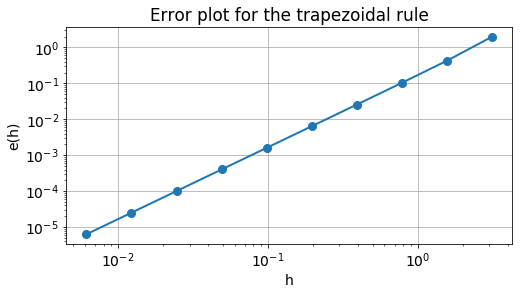

In [7]:
# Find the order and the error plot for the trapezoidal rule

def trapezoidal(f, a, b, n):
    # The trapezoidal rule
    h = (b-a)/n                 # The stepsize
    x = linspace(a, b, n+1)     # Create a uniform grid x = [a=x_0,x_1,...,x_{n-1},x_n=b]
    res = h*sum(f(x[1:n]))       # h*(f(x_1)+f(x_2)+...+f(x_{n-1})
    res = res + 0.5*h*(f(a)+f(b))   # add the function values of the endpoints a and b
    return res

def f(x):                       # Define the function
    return sin(x)

a, b = 0, pi                    # integration interval
exact = 2

# Find an numerical approximation for different values of h. 
# Store the stepsize h and the error
n = 1                           # initial stepsize, h=(b-a) 
h = (b-a)/n
steps = []                      # arrays to store stepsizes and errors
errors = []
Nmax = 10
for k in range(Nmax):
    numres = trapezoidal(f, a, b, n)    # Numerical approximation
    eh = abs(exact - numres)            # Error e(h)
    print('h = {:8.2e},   T(h) = {:10.8f},   e(h) = {:8.2e}'.format(h, numres, eh))
    steps.append(h)                     # Append the step to the array
    errors.append(eh)                   # Append the error to the array
    n = 2*n                             # Reduce the stepsize with a factor 2
    h = (b-a)/n

# Find the order and the error constant
print('\nThe order p and the error constant C')
for k in range(1, Nmax-1):
    p = log(errors[k+1]/errors[k])/log(steps[k+1]/steps[k])
    C = errors[k+1]/steps[k+1]**p
    print('h = {:8.2e},  p = {:4.2f},  C = {:6.4f}'.format(steps[k], p, C))

# Make an error plot
clf()
loglog(steps, errors, 'o-')
xlabel('h')
ylabel('e(h)')
title('Error plot for the trapezoidal rule')
grid('True')

# Taylor-expansions
Given a function $f\in C^{\infty}[a,b]$. Choose a point $x$ and an increment $h$ such that $x, x+h \in [a,b]$. The Taylor series expansion of $f$ around $x$ is then given by

$$
\sum_{k=0}^{\infty} \frac{h^k}{k!}f^{(k)}(x).
$$

The function $f$ is called analytic in $x$ if the series converges for sufficiently small values of $|h|$ to $f$, that is, if
$$
f(x+h) = \sum_{k=0}^{\infty} \frac{h^k}{k!}f^{(k)}(x).
$$


In numerics, we will usually work with the trunctated series, also called the Taylor polynomial (+ remainder term), which exists for all $f \in C^{k+1}[a,b]$:

$$
f(x+h) = \sum_{k=0}^{m} \frac{h^k}{k!}f^{(k)}(x) + R_{m+1}(x).
$$

Here the remainder term is given by

$$
R_{m+1}(x) = \frac{h^{m+1}}{(m+1)!} f^{(m+1)}(\xi),
$$

where $\xi$ is some unknown point between $x$ and $x+h$. The truncated expansion will often simply be written as

$$
f(x+h) = \sum_{k=0}^{m} \frac{h^k}{k!}f^{(k)}(x) + \mathcal{O}(h^{m+1}).
$$

# Some other useful results

**Result 1:**
Let $f\in C[a,b]$ and let $u$ be some number between $f(a)$ and $f(b)$, then there exist at least one $\xi \in (a,b)$ such that $f(\xi)=u$.

**Result 2:**
 Let $f\in C[a,b]$. Given $k$ nodes $x_i\in [a,b]$ and $k$ positive weights
$w_i>0$, $i=1,\dotsc,k$. Then there exists at least one $\xi \in (a,b)$ such that

$$
\sum_{i=1}^{k} w_i f(x_i) = f(\eta) \sum_{i=1}^k w_i. 
$$

**Result 3:**
 Let $f\in C^1[a,b]$. Then there exists at least one $\xi\in (a,b)$ such that

$$
f'(\xi) = \frac{f(b)-f(a)}{b-a}
$$

**Result 4:**
(Rolle's theorem) Let $f\in C^1[a,b]$ and $f(a)=f(b)=0$. Then there exists at least one $\xi \in (a,b)$ such that $f'(\xi)=0$.